In [73]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [75]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [76]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [125]:
#extract a list of column names for data wrangling
market_colnames = list(df_market_data.columns)
print(market_colnames)

#extract a list of coin_ids for index
market_index = list(df_market_data.index)
print(market_index)

# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_scaled = StandardScaler().fit_transform(
    df_market_data[market_colnames]
)

#convert the np array back into a dataframe, using the columns saved from earlier
df_scaled = pd.DataFrame(df_scaled, columns = market_colnames)

#use the index array to crate a new variable
df_scaled["coin_id"] = market_index
#df_scaled.index = market_index
#df_scaled.columns = market_colnames

#set the new variable to index
df_scaled = df_scaled.set_index("coin_id")

#print to make sure worked correctly
df_scaled.head(5)

['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash', 'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd', 'digibyte']


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [78]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12, 1))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [79]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)

    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_scaled)

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

In [80]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is either 4 or 3.

In [82]:
optimal_k = [4, 3]

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [83]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = optimal_k[0], random_state = 0)

In [84]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)


KMeans(n_clusters=4, random_state=0)

In [85]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(kmeans_predictions)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [98]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()
df_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [87]:
# Add a new column to the DataFrame with the predicted clusters
df_copy["kmeans-segments"] = kmeans_predictions

# Display sample data
df_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,kmeans-segments
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [88]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="kmeans-segments"
)

:NdOverlay   [kmeans-segments]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [89]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [90]:
# Use the PCA model with `fit_transform` to reduce to # three principal components.
coin_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
coin_pca[0:5,:]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [91]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print(pca.explained_variance_ratio_)

sum_var = sum(pca.explained_variance_ratio_)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [92]:
print(f"The three principal components explain {round((sum_var *100), 2)}% of the variance in the 6 columns.")

The three principal components explain 89.5% of the variance in the 6 columns.


In [96]:
# Create a new DataFrame with the PCA data.
df_coin_pca = pd.DataFrame(coin_pca, columns = ["pc1", "pc2", "pc3"])

# Copy the crypto names from the original data
df_coin_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_coin_pca = df_coin_pca.set_index("coin_id")

# Display sample data
df_coin_pca.head(10)

,pc1,pc2,pc3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [97]:
# Create a list with the number of k-values from 1 to 11
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [100]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k

for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmean_pca = KMeans(n_clusters = i)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmean_pca.fit(df_coin_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(kmean_pca.inertia_)


In [106]:
# Create a dictionary with the data to plot the Elbow curve
elbow_kmean_pca = {"k" : k, "inertia_pca": inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_kmean_pca)

df_elbow_pca


,k,inertia_pca
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.975977
5,6,27.618972
6,7,21.134056
7,8,17.016962
8,9,13.668117
9,10,10.572380


In [107]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the DataFrame
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia_pca", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

In [111]:
optimal_k_pca = 4
print(f"The best value for k is now more clearly {optimal_k_pca}")

The best value for k is now more clearly 4


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [114]:
# Initialize the K-Means model using the best value for k
kmean_pca = KMeans(n_clusters = optimal_k_pca, random_state = 0)

In [115]:
# Fit the K-Means model using the PCA data
kmean_pca.fit(df_coin_pca)

KMeans(n_clusters=4, random_state=0)

In [116]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmean_pca_prediction = kmean_pca.predict(df_coin_pca)
# Print the resulting array of cluster values.
print(kmean_pca_prediction)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [117]:
# Create a copy of the DataFrame with the PCA data
df_pca_final = df_coin_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_final["predicted"] = kmean_pca_prediction

# Display sample data
df_pca_final.head(10)

,pc1,pc2,pc3,predicted
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [120]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_final.hvplot.scatter(
    x="pc1",
    y="pc2",
    by="predicted",
    hover_cols = "coin_id"
)



:NdOverlay   [predicted]
   :Scatter   [pc1]   (pc2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

<AxesSubplot:>

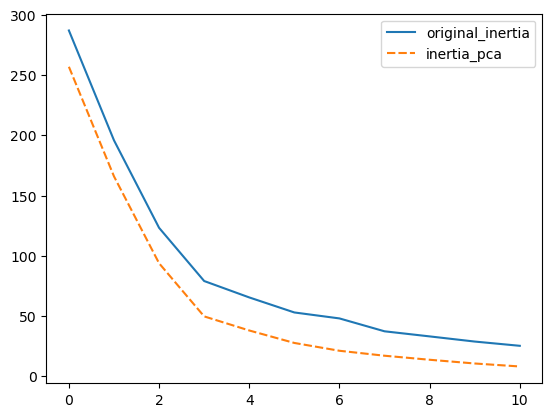

In [124]:
# Composite plot to contrast the Elbow curves
df_elbow_pca["original_inertia"] = df_elbow["inertia"]

import seaborn as sns
import matplotlib as plt
sns.lineplot(data = df_elbow_pca[["original_inertia", "inertia_pca"]])

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
sns.FacetGrid(tips, col="time")


In [ ]:
df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="kmeans-segments"
)



#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The groups are more distinguishable, and the number of clusters is a bit clearer.